In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h2>Task 1</h2>

**(a)**

**Condition 1**

If a Markov chain is *reversible* (detailed balance) with respect to a distribution $\, \pi, \,$ then $\, \pi \,$ is the *stationary distribution* of the Markov chain. Proof. $\, \forall y \in \mathbb{S}, \,$

$$ (\pi P)(y) = \sum_{x \in \mathbb{S}} \pi (x) P(x, y) = \sum_{x \in \mathbb{S}} \pi (y) P(y, x) = \pi (y) \sum_{x \in \mathbb{S}} P(y,x) = \pi (y). $$

This is the definition of a **stationary distribution.**

**Condition 2**

A Markov chain is said to be (time) reversible with respect to the distribution $\, \pi, \,$ if the following holds

$$ \pi(x) P(x,y) = \pi(y) P(y,x), $$

where $\, P(x,y) \,$ is the transition matrix of the Markov chain. This is called the **detailed balance condition** (aikakääntyvä, yksityiskohtainen tasapaino).

It is easy to see that condition 2 implies condition 1. However, it does not hold the other way around (condition 1 does not imply condition 2).

**(b)**

- $\, \mathbb{S} = \mathbb{Z}. \,$

- Since we are given that $\, P(x,y) = 0, \,$ when $\, |x - y| \ge 2, \,$ we are dealing with a so-called nearest neigbor constraint; we can only move from state $\, x \,$ to either state $\, x - 1 \,$ or state $\, x + 1 \,$ (or stay in the current state $\, x).$

- $\, \pi(x) = \frac{2^{-|x|}}{3}, \, \, x \in \mathbb{Z}. \,$

As mentioned in **(a),** if a Markov chain is (time) reversible with respect to $\, \pi \,$

$$ \pi(x) P(x,y) = \pi(y) P(y,x) \quad \forall x, y \in \mathbb{S}, $$

then it follows that the $\, \pi \,$ is the stationary distribution of the Markov chain.

The Markov chain proposes moves as follows. From any current state $\, x, \,$
- Move to $\, x + 1 \,$ with a probability of $\, 1/2 \,$
- Move to $\, x - 1 \,$ with a probability of $\, 1/2 \,$

Note that even though we can also stay in the current state $\, x, \,$ this is not a move that is included in the proposal distribution. We'll denote the proposal distribution with $\, q(y | x). \,$ We then have

$$ q(y = x + 1 | x) = q(y = x - 1 | x) = 1/2 $$

i.e., the proposal distribution is symmetric $\, \rightarrow \,$ *Metropolis* algorithm (instead of *Metropolis-Hastings*) (see lecture notes p. 44). The acceptance probability in the Metropolis algorithm is

$$ A(x \rightarrow y) = \text{min} \left(1, \frac{\pi(y)}{\pi(x)} \right). $$

In other words

- If $\, p(y) \ge p(x), \,$ we accept the move with probability $\, 1 \,$
- If $\, p(y) < p(x), \,$ we reject the move with some probability (note that we can still accept the move in this case as well)

Hence, the probability of moving from $\, x \,$ to $\, y \,$ is the probability of *proposing* $\, y, \,$ given the current state $\, x, \,$ times the probability of accepting the move. Mathematically described:

$$ P(x,y) = q(y|x) \, A(x \rightarrow y). $$

From this it follows that the probability of staying at the current state $\, x \,$ is $\, 1 \,$ minus the probability that we move to either direction. In other words

\begin{align*}
    P(x,x) &= 1 - q(x+1|x) \, A(x \rightarrow x+1) - q(x-1|x) \, A(x \rightarrow x-1) \\
    &= 1 - \sum_{x \ne y} P(x,y)
\end{align*}

In [2]:
def p(x):
    """
    The target distribution that we want our Markov chain to converge to.
    We denote this by pi(x) in the notes above.
    """
    return 2.0**(-np.abs(x)) / 3

In [3]:
def metropolis_algo(x):
    """
    Implement one step of the Metropolis algorithm.
    
    Notes:
        - y ~ q(y|x) is sampled from the proposal distribution
          (the proposal distribution is used to suggest new candidates, 
          given the current state x).
        - p is the target probability distribution (note that it might be unnormalized
          since it is sufficient for us to know the nominator of the PDF).
    """
    # Proposing a move y=x+1 or y=x-1 with equal probabilities
    y = x + np.random.choice(a=[-1, 1], size=1, p=[1/2, 1/2]).item()
    
    # Acceptance probability
    A = min(1, p(y) / p(x))
    
    # Simulate U ~ Uniform(0,1)
    u = np.random.uniform()
    
    # If U <= A, we accept the move, otherwise we reject it (stay in the current state)
    if u <= A:
        return y
    else:
        return x

In [4]:
n = 100000    # Number of Metropolis steps to take
x = 0         # Initial state

states = []
for _ in range(n):
    x = metropolis_algo(x)
    states.append(x)

In [34]:
dummy = np.unique(states, return_counts=True)
for state, count in zip(dummy[0], dummy[1]):
    print(f'The number of times state {state} got visited: {count}')

The number of times state -15 got visited: 2
The number of times state -14 got visited: 4
The number of times state -13 got visited: 4
The number of times state -12 got visited: 4
The number of times state -11 got visited: 15
The number of times state -10 got visited: 27
The number of times state -9 got visited: 53
The number of times state -8 got visited: 105
The number of times state -7 got visited: 220
The number of times state -6 got visited: 446
The number of times state -5 got visited: 926
The number of times state -4 got visited: 1964
The number of times state -3 got visited: 4067
The number of times state -2 got visited: 8235
The number of times state -1 got visited: 16789
The number of times state 0 got visited: 33508
The number of times state 1 got visited: 16727
The number of times state 2 got visited: 8387
The number of times state 3 got visited: 4169
The number of times state 4 got visited: 2233
The number of times state 5 got visited: 1107
The number of times state 6 got 

In [28]:
# The empirical distribution
# (i.e., the proportions how often the Markov chain visited each state)
empirical_distribution = np.unique(states, return_counts=True)[1] / len(states)

In [29]:
empirical_distribution.round(3)

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.001, 0.002,
       0.004, 0.009, 0.02 , 0.041, 0.082, 0.168, 0.335, 0.167, 0.084,
       0.042, 0.022, 0.011, 0.005, 0.002, 0.001, 0.001, 0.   , 0.   ,
       0.   , 0.   ])

In [30]:
# The unique states that our simulated Markov chain visited
unique_states = np.unique(states)

# The theoretical probabilities we expect our Markov chain to converge to
theoretical_distr = np.array([p(state) for state in unique_states])

# Since the state space is Z (all integers), we have to normalize
# the theoretical distribution to match the empirical distribution
theoretical_distr_normalized = theoretical_distr / np.sum(theoretical_distr)

In [31]:
theoretical_distr_normalized.round(3)

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.001, 0.001, 0.003,
       0.005, 0.01 , 0.021, 0.042, 0.083, 0.167, 0.333, 0.167, 0.083,
       0.042, 0.021, 0.01 , 0.005, 0.003, 0.001, 0.001, 0.   , 0.   ,
       0.   , 0.   ])

- As can be seen, the theoretical distribution is pretty close to the empirical distribution.

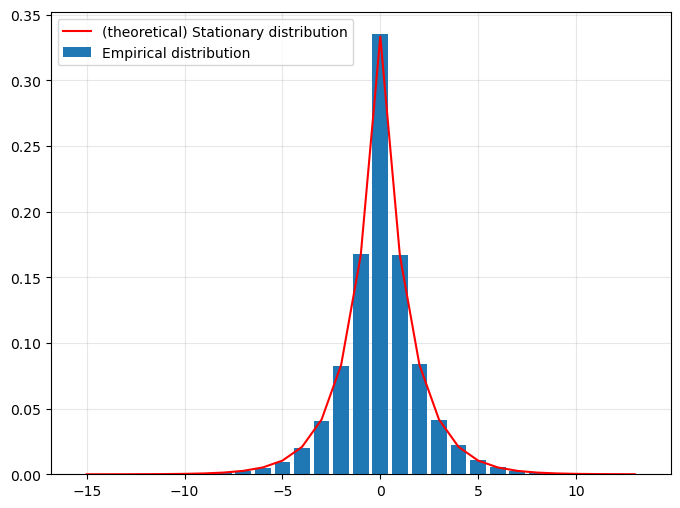

In [41]:
fig, ax = plt.subplots(figsize=(8,6))
ax.bar(unique_states, 
       empirical_distribution, 
       zorder=2, 
       label='Empirical distribution')
ax.plot(unique_states, 
        theoretical_distr_normalized, 
        color='red', 
        zorder=3, 
        label='(theoretical) Stationary distribution')
ax.grid(True, alpha=0.3, zorder=1)
ax.legend();

<h2>Task 2</h2>

**(a)**

A Markov chain is said to be reversible with respect to a distribution $\, \pi \,$ if the detail balanced condition holds

$$ \pi(x) \, P(x \rightarrow y) = \pi(y) \, P(y \rightarrow x). $$

In the *Metropolis-Hastings* algorithm, 

$$\, P(x \rightarrow y) = q(y|x) \, \alpha(x \rightarrow y), \,$$ 

where $\, q(y|x) \,$ is the probability of proposing $\, y, \,$ given $\, x, \,$ and $\, \alpha(x \rightarrow y) \,$ is the probability of accepting the proposed move from $\, x \,$ to $\, y. \,$ Hence, the detailed balanced condition in the *Metropolis-Hastings* algorithm is

\begin{align*}
    \pi(x) \, P(x \rightarrow y) &= \pi(y) \, P(y \rightarrow x) \\
    \pi(x) \, q(y|x) \, \alpha(x \rightarrow y) &= \pi(y) \, q(x|y) \, \alpha(y \rightarrow x) \tag{1}
\end{align*}

$\, \forall x, y \in \mathbb{S}, x \ne y. \,$

Rearranging equation $\, (1) \,$ above we get

$$ \frac{\alpha(x \rightarrow y)}{\alpha(y \rightarrow x)} = \frac{\pi(y) \, q(x|y)}{\pi(x) \, q(y|x)} \tag{2} $$

Equation $\, (2) \,$ is useful in part **(b).**

**(b)**

Don't really understand why the acceptance probability is missing the minimum argument. Anyway, let

$$ r(x,y) = \frac{\alpha(x \rightarrow y)}{\alpha(y \rightarrow x)} = \frac{\pi(y) \, q(x|y)}{\pi(x) \, q(y|x)} \tag{3} $$

Then, the acceptance probability is

$$ \alpha(x \rightarrow y) = \text{min}(1, r(x,y)). $$

There are two cases to check ([ref](https://www.youtube.com/watch?v=yCv2N7wGDCw)).

Case 1: $\, r(x,y) < 1 \,$

- $\, \alpha(x\rightarrow y) = r(x,y) \,$
- $\, \alpha(y\rightarrow x) = 1 \,$ (look at equation $\, (3) \,$ to understand why)

Hence, we get

\begin{align*}
    \pi(x) \, P(x \rightarrow y) &= \pi(x) \, q(y|x) \, \alpha(x \rightarrow y) \\
    &= \pi(x) \, q(y|x) \, r(x,y) \\
    &= \pi(x) \, q(y|x) \, \frac{\pi(y) \, q(x|y)}{\pi(x) \, q(y|x)} \\
    &= \pi(y) \, q(x|y) \\
    &= \pi(y) \, q(x|y) \, \alpha(y\rightarrow x) \\
    &= \pi(y) \, P(y \rightarrow x)
\end{align*}

So the detailed balanced condition holds.

Case 2: $\, r(x,y) \ge 1 \,$

- $\, \alpha(x\rightarrow y) = 1 \,$
- $\, \alpha(y \rightarrow x) = \large \frac{1}{r(x,y)} \,$

Hence, we get

\begin{align*}
    \pi(y) \, P(y \rightarrow x) &= \pi(y) \, q(x|y) \, \alpha(y \rightarrow x) \\
    &= \pi(y) \, q(x|y) \, \frac{1}{r(x,y)} \\
    &= \pi(y) \, q(x|y) \, \frac{\pi(x) \, q(y|x)}{\pi(y) \, q(x|y)} \\
    &= \pi(x) \, q(y|x) \\
    &= \pi(x) \, q(y|x) \, \alpha(x\rightarrow y) \\
    &= \pi(x) \, P(x \rightarrow y)
\end{align*}

So the detailed balanced condition holds.

The deriation above proves that formula **2** is in fact correct. It turns out that formula **3** is correct as well, and the derivation is similar. Formula **3** is called the [Baker's](https://arxiv.org/pdf/1709.07710) acceptance probability (see page 3 on the link).